In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import norm, multivariate_normal

from kdelearn.kde import KDE
from kdelearn.ckde import CKDE
from kdelearn.ckde_tasks import CKDEClassification, CKDEOutliersDetection, CKDEClustering

# Dataset parameters

Parametry mieszaniny rozkładów Gaussa używanych w dalszych przykładach:

$$
seed=1
$$

$$
m=1000
$$

$$
m_1=0.25m
$$

\begin{equation*}
E_1 =
\left(\begin{array}{c}
-3 \\
0
\end{array}\right)
\end{equation*}

\begin{equation*}
Cov_1 =
\left(\begin{array}{cc}\ 
4 & -1.4\\
-1.4 & 1
\end{array}\right)
\end{equation*}


$$
m_2=0.5m
$$

\begin{equation*}
E_2 =
\left(\begin{array}{c}
2 \\
0
\end{array}\right)
\end{equation*}

\begin{equation*}
Cov_2 =
\left(\begin{array}{cc}\ 
1 & 0.7\\
0.7 & 1
\end{array}\right)
\end{equation*}


$$
m_3=0.15m
$$

\begin{equation*}
E_3 =
\left(\begin{array}{c}
5 \\
0
\end{array}\right)
\end{equation*}

\begin{equation*}
Cov_3 =
\left(\begin{array}{cc}\ 
1 & 0.9\\
0.9 & 1
\end{array}\right)
\end{equation*}


$$
m_4=0.1m
$$

\begin{equation*}
E_4 =
\left(\begin{array}{c}
0 \\
0
\end{array}\right)
\end{equation*}

\begin{equation*}
Cov_4 =
\left(\begin{array}{cc}\ 
25 & 0\\
0 & 4
\end{array}\right)
\end{equation*}

Uwaga: Dane z 4 członu to traktowane są jako szum i nie biorą udziału dalej w przykładzie z klasyfikacją.

In [3]:
np.random.seed(1)

# Data
m_train = 1000
n_x, n_y = 1, 1

## class 1
m_train1 = int(0.25 * m_train)
mean1 = [-3, 0]
cov1 = [[4, -1.4],
        [-1.4, 1]]
z_train1 = np.random.multivariate_normal(mean1, cov1, m_train1)
x_train1 = z_train1[:, [0]]
y_train1 = z_train1[:, [1]]
labels_train1 = np.full(m_train1, 1, dtype=np.int32)

## class 2
m_train2 = int(0.5 * m_train)
mean2 = [2, 0]
cov2 = [[1, 0.7],
        [0.7, 1]]
z_train2 = np.random.multivariate_normal(mean2, cov2, m_train2)
x_train2 = z_train2[:, [0]]
y_train2 = z_train2[:, [1]]
labels_train2 = np.full(m_train2, 2, dtype=np.int32)

## class 3
m_train3 = int(0.15 * m_train)
mean3 = [5, 0]
cov3 = [[1, 0.9],
        [0.9, 1]]
z_train3 = np.random.multivariate_normal(mean3, cov3, m_train3)
x_train3 = z_train3[:, [0]]
y_train3 = z_train3[:, [1]]
labels_train3 = np.full(m_train3, 3, dtype=np.int32)

## class 4
m_train4 = int(0.1 * m_train)
mean4 = [0, 0]
cov4 = [[25, 0],
        [0, 4]]
z_train4 = np.random.multivariate_normal(mean4, cov4, m_train4)
x_train4 = z_train4[:, [0]]
y_train4 = z_train4[:, [1]]
labels_train4 = np.full(m_train4, 4, dtype=np.int32)

## 
x_train = np.concatenate((x_train1, x_train2, x_train3, x_train4), axis=0)
y_train = np.concatenate((y_train1, y_train2, y_train3, y_train4), axis=0)
labels_train = np.concatenate((labels_train1, labels_train2, labels_train3, labels_train4))

\newpage

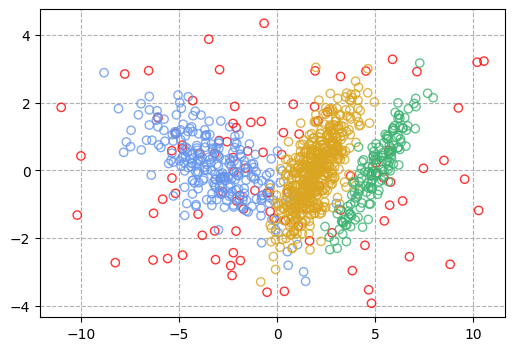

In [4]:
plt.figure(figsize=(6, 4))

plt.scatter(x_train4, y_train4, facecolors="none", edgecolors="red", zorder=2, alpha=0.8)
plt.scatter(x_train1, y_train1, facecolors="none", edgecolors="cornflowerblue", zorder=2, alpha=0.8)
plt.scatter(x_train2, y_train2, facecolors="none", edgecolors="goldenrod", zorder=2, alpha=0.8)
plt.scatter(x_train3, y_train3, facecolors="none", edgecolors="mediumseagreen", zorder=2, alpha=0.8)

plt.grid(linestyle="--")
plt.show()

# Classification ($y^*=1$)

## Training

In [5]:
# Data
x_train = np.concatenate((x_train1, x_train2, x_train3), axis=0)
y_train = np.concatenate((y_train1, y_train2, y_train3), axis=0)
labels_train = np.concatenate((labels_train1, labels_train2, labels_train3))

m_train = x_train.shape[0]
x_grid = np.linspace(-15, 15, 1000)[:, None]
y_star = np.array([1.0] * n_y)

classifier = CKDEClassification().fit(x_train, y_train, y_star, labels_train)
scores = classifier.pdfs(x_grid)

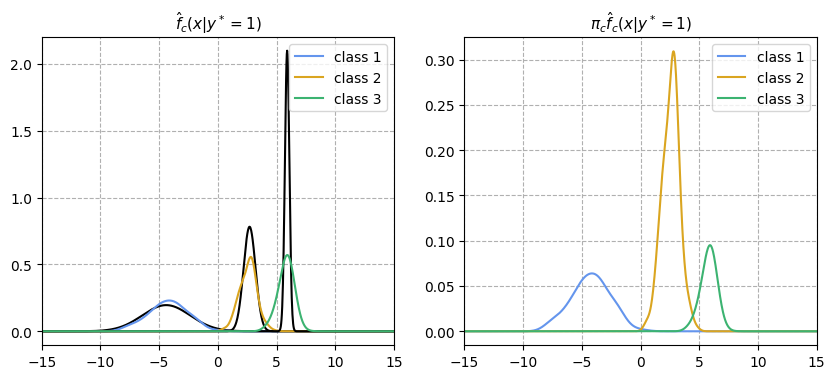

In [10]:
# https://en.wikipedia.org/wiki/Multivariate_normal_distribution#Bivariate_case_2

fig, axs = plt.subplots(1, 2, figsize=(10, 4), dpi=100)

true_dist1 = norm.pdf(x_grid, loc=-4.4, scale=2.04)
axs[0].plot(x_grid, true_dist1, c="k")
axs[0].plot(x_grid, scores[:, 0], c="cornflowerblue", label="class 1")
true_dist2 = norm.pdf(x_grid, loc=2.7, scale=0.51)
axs[0].plot(x_grid, true_dist2, c="k")
axs[0].plot(x_grid, scores[:, 1], c="goldenrod", label="class 2")
true_dist3 = norm.pdf(x_grid, loc=5.9, scale=0.19)
axs[0].plot(x_grid, true_dist3, c="k")
axs[0].plot(x_grid, scores[:, 2], c="mediumseagreen", label="class 3")
axs[0].set_title("$\hat{f}_c(x|y^*=1)$", fontsize=11)
axs[0].legend(fontsize=10)
axs[0].set_xlim(-15, 15)
axs[0].set_ylim(top=2.2)
axs[0].grid(linestyle="--")

axs[1].plot(x_grid, m_train1 / m_train * scores[:, 0], c="cornflowerblue", label="class 1")
axs[1].plot(x_grid, m_train2 / m_train * scores[:, 1], c="goldenrod", label="class 2")
axs[1].plot(x_grid, m_train3 / m_train * scores[:, 2], c="mediumseagreen", label="class 3")
axs[1].set_title("$\\pi_c \\hat{f}_c(x|y^*=1)$", fontsize=11)
axs[1].legend(fontsize=10)
axs[1].set_xlim(-15, 15)
# axs[1].set_ylim(top=0.8)
axs[1].grid(linestyle="--")

plt.show()

## Testing

In [7]:
# Test data
m_test1 = 10 * m_train1
x_test1 = np.random.normal(loc=-4.4, scale=2.04, size=m_test1)[:,None]
labels_test1 = np.full(m_test1, 1, dtype=np.int32)

m_test2 = 10 * m_train2
x_test2 = np.random.normal(loc=2.7, scale=0.51, size=m_test2)[:,None]
labels_test2 = np.full(m_test2, 2, dtype=np.int32)

m_test3 = 10 * m_train3
x_test3 = np.random.normal(loc=5.9, scale=0.19, size=m_test3)[:,None]
labels_test3 = np.full(m_test3, 3, dtype=np.int32)

x_test = np.concatenate((x_test1, x_test2, x_test3), axis=0)
labels_test = np.concatenate((labels_test1, labels_test2, labels_test3))
m_test = x_test.shape[0]

# Classify
classifier = CKDEClassification().fit(x_train, y_train, y_star, labels_train)
labels_pred = classifier.predict(x_test)

print(f"Accuracy: {(labels_pred == labels_test).sum() / m_test:.6f}")

Accuracy: 0.995556
